In [1]:
# importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Victor Santos\\Desktop\\IMPACTA\\modelagem_rh.csv')

In [3]:
df

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [111]:
df.describe()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos
count,14978.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612828,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248795,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Verificação de valores ausentes

In [4]:
df.isnull().sum().sort_values(ascending=False)

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [7]:
# Exclusão de observações ausentes

df.dropna(inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False)

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [9]:
df.head(19000)

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Frequência das pessoas que sairam e permaneceram na empresa

In [11]:
frequencia = df.saiu.value_counts()

In [12]:
porcentagem = frequencia / len(df) * 100
porcentagem

0    76.205101
1    23.794899
Name: saiu, dtype: float64

<AxesSubplot:>

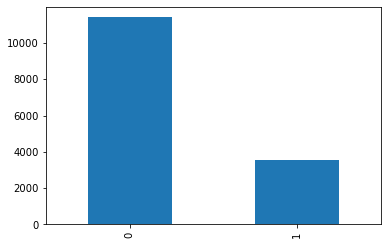

In [13]:
frequencia.plot(kind='bar')

([<matplotlib.axis.XTick at 0x1d9e891f820>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

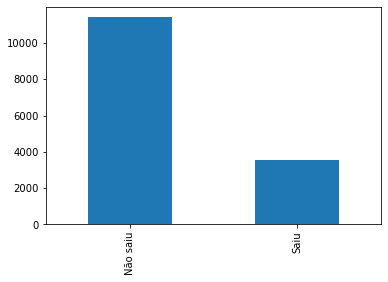

In [15]:
frequencia.plot(kind='bar')
plt.xticks((0,1), ['Não saiu', 'Saiu'])

In [19]:
# Tabela Cruzada por departamento

valores = pd.crosstab(df['departamento'], df['saiu']) 

In [20]:
print(type(valores))
print(valores)

<class 'pandas.core.frame.DataFrame'>
saiu             0     1
departamento            
IT             954   273
RandD          666   121
accounting     563   204
hr             524   214
management     539    91
marketing      652   202
product_mng    703   198
sales         3117  1010
support       1673   555
technical     2023   696


In [21]:
soma = valores.sum(axis=1)
print(soma)

departamento
IT             1227
RandD           787
accounting      767
hr              738
management      630
marketing       854
product_mng     901
sales          4127
support        2228
technical      2719
dtype: int64


In [22]:
#Porcentagem por departamento

freq = valores.divide(soma, axis=0) * 100
print(round(freq,2))

saiu              0      1
departamento              
IT            77.75  22.25
RandD         84.63  15.37
accounting    73.40  26.60
hr            71.00  29.00
management    85.56  14.44
marketing     76.35  23.65
product_mng   78.02  21.98
sales         75.53  24.47
support       75.09  24.91
technical     74.40  25.60


In [23]:
porcentagem_dep =  freq 

<AxesSubplot:xlabel='departamento'>

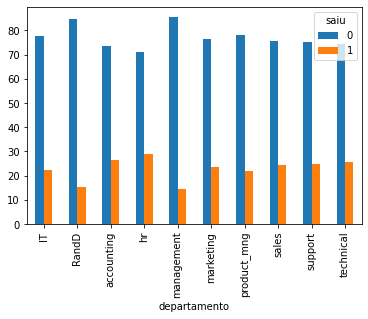

In [24]:
porcentagem_dep.plot(kind="bar")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14978 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14978 non-null  float64
 2   num_projetos        14978 non-null  int64  
 3   media_horas_mes     14978 non-null  int64  
 4   tempo_empresa       14978 non-null  int64  
 5   aci_trabalho        14978 non-null  int64  
 6   saiu                14978 non-null  int64  
 7   promocao_ult_5anos  14978 non-null  int64  
 8   departamento        14978 non-null  object 
 9   salario             14978 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### Criando Variáveis Dummies

In [26]:
df = pd.get_dummies(df, drop_first=True )

In [27]:
df.head(2000)

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2002,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2003,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2004,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Normalizando os dados

In [129]:
pd.DataFrame([df.max(), df.min()], index= ["max", "min"])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
pd.DataFrame([df.max(), df.min()], index= ["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [28]:
from sklearn import preprocessing

In [29]:
x = df.values

In [30]:
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()

In [32]:
df_new = min_max_scaler.fit_transform(x)

In [33]:
df_new

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [137]:
df = pd.DataFrame(data= df_new, columns=df.columns)

In [138]:
df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
# Transporndo as variáveis para melhor visulização da normalização

pd.DataFrame([df.max(), df.min()], index= ["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [35]:
df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

In [142]:
df.columns

Index(['nivel_satisfacao', 'ult_avaliacao', 'num_projetos', 'media_horas_mes',
       'tempo_empresa', 'aci_trabalho', 'saiu', 'promocao_ult_5anos',
       'departamento_RandD', 'departamento_accounting', 'departamento_hr',
       'departamento_management', 'departamento_marketing',
       'departamento_product_mng', 'departamento_sales',
       'departamento_support', 'departamento_technical', 'salario_low',
       'salario_medium'],
      dtype='object')

In [36]:
# Reordenando avariável "saiu" para última posição

df = df.reindex(columns=['nivel_satisfacao', 'ult_avaliacao', 'num_projetos', 'media_horas_mes',
       'tempo_empresa', 'aci_trabalho', 'promocao_ult_5anos',
       'departamento_RandD', 'departamento_accounting', 'departamento_hr',
       'departamento_management', 'departamento_marketing',
       'departamento_product_mng', 'departamento_sales',
       'departamento_support', 'departamento_technical', 'salario_low',
       'salario_medium','saiu'])

In [37]:
X = df.iloc[:, :-1]
y = df.iloc[:, 18]

### Treinamento do modelo KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=4)

In [60]:
#Separando a base de dados em treino e teste ( 80% teste, 20% treino)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
# Treinando o modelo

knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=3)

In [62]:
predicted = knn.predict(X_test)

In [63]:
accuracy_score(predicted,y_test)

0.9445927903871829

In [64]:
confusion_matrix(predicted, y_test)

array([[2175,   47],
       [ 119,  655]], dtype=int64)

### Treinando modelo Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
tree = DecisionTreeClassifier(random_state=2, max_depth=3)

In [69]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [70]:
accuracy_score(tree.predict(X_test), y_test)

0.9576101468624834

In [71]:
confusion_matrix(tree.predict(X_test), y_test)

array([[2219,   52],
       [  75,  650]], dtype=int64)

### Validação Cruzada

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [75]:
scores

array([0.94158879, 0.92323097, 0.93090788, 0.95592654, 0.93188648])

In [78]:
# média de validação cruzada knn

scores.mean()

0.936708131710394

In [79]:
# Desvio padrão

scores.std()

0.011240046463260454

In [80]:
scores_tree = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

In [81]:
scores_tree

array([0.96728972, 0.96128171, 0.95927904, 0.96293823, 0.91352254])

In [214]:
# média de validação cruzada decision tree

scores_tree.mean()

0.9528622470472594

In [82]:
# Desvio padrão decision tree

scores_tree.std()

0.019846171930905317

In [83]:
tree.feature_importances_

array([0.60565997, 0.14157733, 0.10372303, 0.00514267, 0.143897  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

<AxesSubplot:>

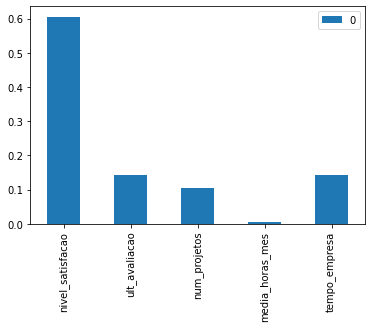

In [84]:
pd.DataFrame(tree.feature_importances_, index=X.columns)[:5].plot(kind="bar")

### Deploy

In [91]:
import pickle

In [92]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [93]:
pickle.dump(tree, open("modelo_rh.pickle", "wb"))

In [94]:
tree_salva = pickle.load(open("modelo_rh.pickle", "rb"))

In [95]:
tree_salva

DecisionTreeClassifier(max_depth=3, random_state=2)

In [96]:
tree_salva.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)